=== BẮT ĐẦU THỰC NGHIỆM (Số lần chạy mỗi bài: 50) ===

Đang xử lý ZDT1....................................................BẮT ĐẦU CHẠY (Lần cuối để vẽ hình): ZDT1
• Cấu hình: Obj=2 | Var=30 | Pop=300 | Gen=50
Thời gian chạy: 1.3645 giây
  >> IGD Final: 0.059997
  >> HV  Final: 0.778209


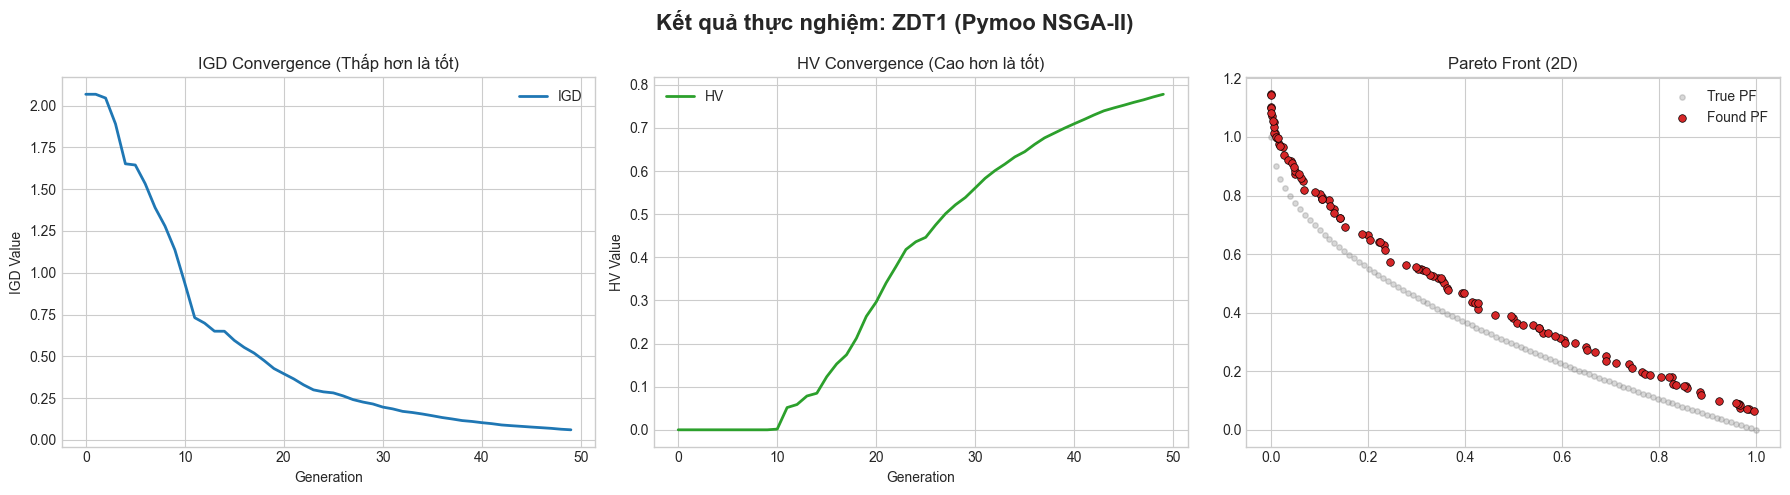

. Hoàn tất.
Đang xử lý ZDT2....................................................BẮT ĐẦU CHẠY (Lần cuối để vẽ hình): ZDT2
• Cấu hình: Obj=2 | Var=30 | Pop=300 | Gen=50
Thời gian chạy: 1.5145 giây
  >> IGD Final: 0.095340
  >> HV  Final: 0.378865


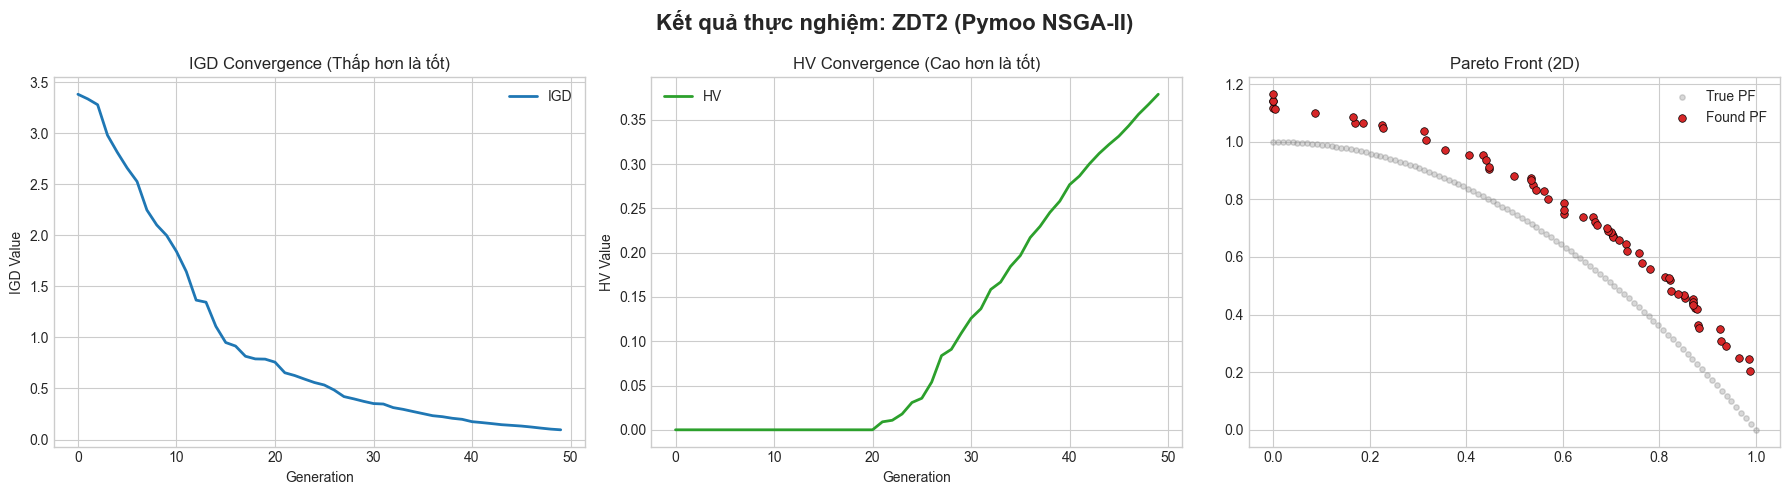

. Hoàn tất.
Đang xử lý ZDT3....................................................BẮT ĐẦU CHẠY (Lần cuối để vẽ hình): ZDT3
• Cấu hình: Obj=2 | Var=30 | Pop=300 | Gen=50
Thời gian chạy: 2.9515 giây
  >> IGD Final: 0.047763
  >> HV  Final: 0.917525


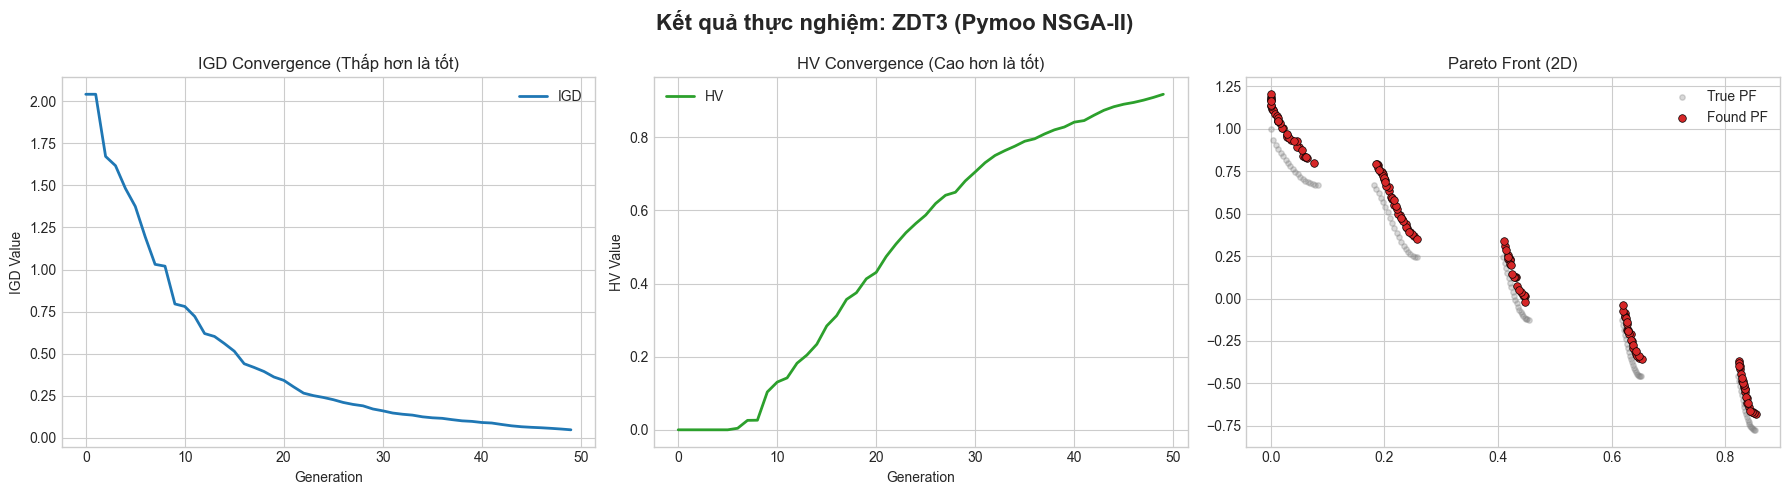

. Hoàn tất.
Đang xử lý ZDT4....................................................BẮT ĐẦU CHẠY (Lần cuối để vẽ hình): ZDT4
• Cấu hình: Obj=2 | Var=10 | Pop=300 | Gen=50
Thời gian chạy: 3.1453 giây
  >> IGD Final: 2.913385
  >> HV  Final: 0.000000


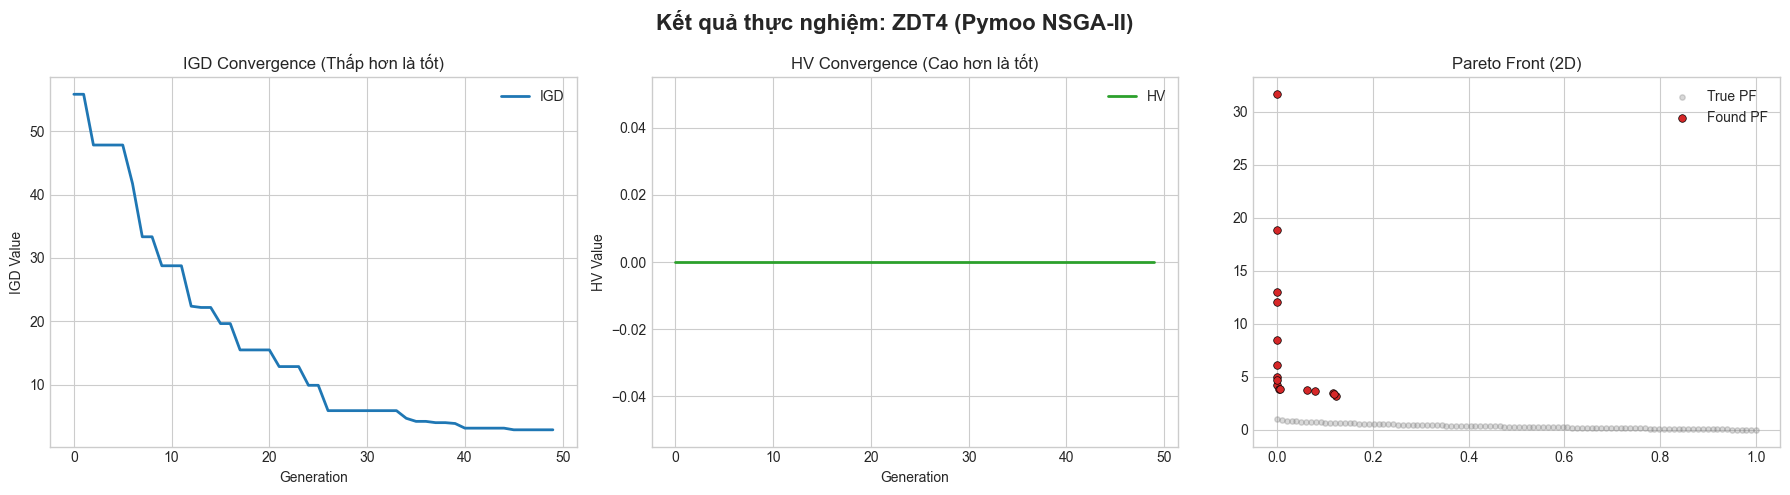

. Hoàn tất.
Đang xử lý ZDT6....................................................BẮT ĐẦU CHẠY (Lần cuối để vẽ hình): ZDT6
• Cấu hình: Obj=2 | Var=10 | Pop=300 | Gen=50
Thời gian chạy: 3.8232 giây
  >> IGD Final: 1.172692
  >> HV  Final: 0.000000


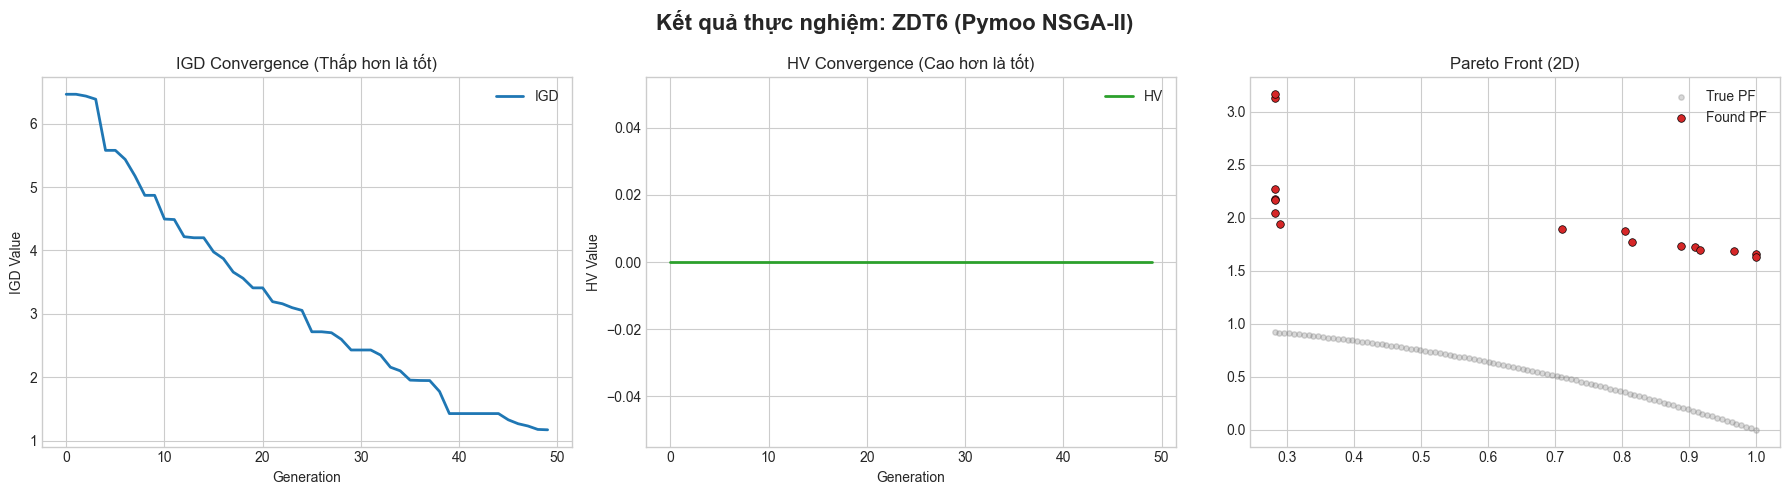

. Hoàn tất.


               KẾT QUẢ TỔNG HỢP (TRUNG BÌNH ± ĐỘ LỆCH CHUẨN - 50 LẦN CHẠY)                
╒═══════════╤═══════════════╤═════════╤═════════╤════════════════════╤════════════════════╤════════════╕
│ Problem   │ Algorithm     │   n_Var │   n_Obj │ IGD (Mean ± Std)   │ HV (Mean ± Std)    │   Time (s) │
╞═══════════╪═══════════════╪═════════╪═════════╪════════════════════╪════════════════════╪════════════╡
│ ZDT1      │ Pymoo NSGA-II │      30 │       2 │ 0.05568 (±0.00771) │ 0.78495 (±0.01221) │    1.70592 │
├───────────┼───────────────┼─────────┼─────────┼────────────────────┼────────────────────┼────────────┤
│ ZDT2      │ Pymoo NSGA-II │      30 │       2 │ 0.11252 (±0.01735) │ 0.35546 (±0.02410) │    1.49173 │
├───────────┼───────────────┼─────────┼─────────┼────────────────────┼────────────────────┼────────────┤
│ ZDT3      │ Pymoo NSGA-II │      30 │       2 │ 0.04256 (±0.00765) │ 0.92745 (±0.01416) │    2.83723 │
├───────────┼───────────────┼─────────┼─────────┼──────

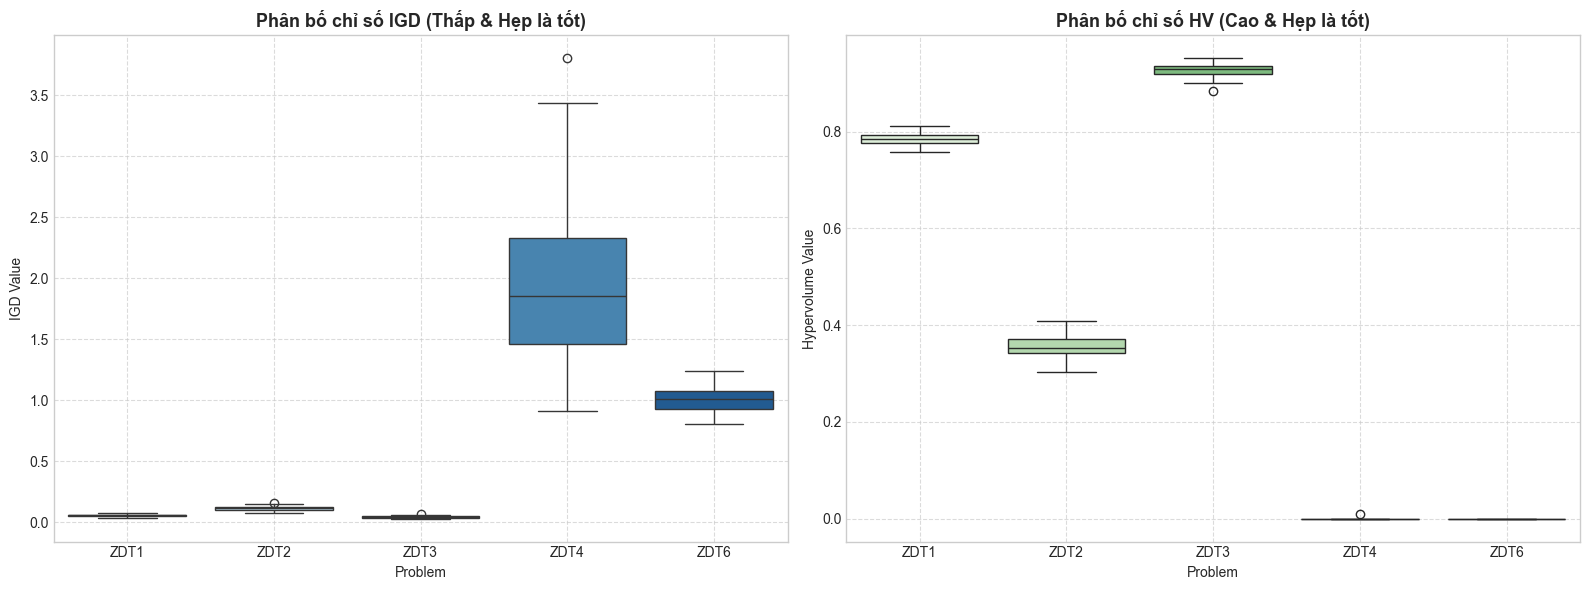

In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Pymoo imports
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
from pymoo.termination import get_termination

# Cấu hình giao diện biểu đồ
plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. SỬA HÀM run_experiment: THÊM THAM SỐ do_plot ---
def run_experiment_pymoo(problem_name, n_gen=100, pop_size=100, seed=42, n_var=None, n_obj=None, do_plot=True):
    # Cấu hình bài toán
    p_name_upper = problem_name.upper()
    
    if do_plot:
        print(f"BẮT ĐẦU CHẠY (Lần cuối để vẽ hình): {p_name_upper}")
    
    # Lấy đối tượng bài toán từ pymoo
    if 'dtlz' in problem_name.lower():
        pymoo_prob = get_problem(problem_name, n_var=n_var, n_obj=n_obj)
        is_3d = True
    else: # ZDT problems
        pymoo_prob = get_problem(problem_name, n_var=n_var)
        n_obj = pymoo_prob.n_obj
        is_3d = False

    if do_plot:
        print(f"• Cấu hình: Obj={n_obj} | Var={n_var} | Pop={pop_size} | Gen={n_gen}")
    
    # Khởi tạo thuật toán
    algorithm = NSGA2(
        pop_size=pop_size,
        eliminate_duplicates=True
    )

    termination = get_termination("n_gen", n_gen)

    start_time = time.time()
    
    # Chạy tối ưu hóa
    res = minimize(
        pymoo_prob,
        algorithm,
        termination,
        seed=seed,
        save_history=True, # Cần lưu history để vẽ biểu đồ hội tụ
        verbose=False
    )
    
    end_time = time.time()
    run_time = end_time - start_time
    
    if do_plot:
        print(f"Thời gian chạy: {run_time:.4f} giây")

    # --- TÍNH TOÁN CHỈ SỐ ---
    true_pf = pymoo_prob.pareto_front()
    final_front = res.F

    # Xác định điểm tham chiếu (Reference Point) cho HV
    if true_pf is not None:
        ref_point = np.max(true_pf, axis=0) * 1.1
    else:
        ref_point = np.max(final_front, axis=0) * 1.1
    
    igd_indicator = IGD(true_pf) if true_pf is not None else None
    hv_indicator = HV(ref_point=ref_point)

    igd_history = []
    hv_history = []

    # Duyệt qua lịch sử để tính chỉ số cho từng thế hệ
    if len(res.history) > 0:
        for algorithm_step in res.history:
            # Lấy mục tiêu (F) của quần thể tại thế hệ đó
            pop_F = algorithm_step.pop.get("F")
            
            # Tính IGD
            if igd_indicator:
                igd_history.append(igd_indicator(pop_F))
            else:
                igd_history.append(0)
            
            # Tính HV
            try:
                hv_history.append(hv_indicator(pop_F))
            except:
                hv_history.append(0)
    else:
        # Fallback nếu không lưu history
        igd_history = [0] * n_gen
        hv_history = [0] * n_gen

    final_igd = igd_history[-1] if igd_history else 0.0
    final_hv = hv_history[-1] if hv_history else 0.0

    # --- VẼ BIỂU ĐỒ (CHỈ KHI do_plot = True) ---
    if do_plot:
        print(f"  >> IGD Final: {final_igd:.6f}")
        print(f"  >> HV  Final: {final_hv:.6f}")

        fig = plt.figure(figsize=(18, 5))
        fig.suptitle(f'Kết quả thực nghiệm: {p_name_upper} (Pymoo NSGA-II)', fontsize=16, fontweight='bold')

        # Subplot 1: IGD
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.plot(igd_history, color='#1f77b4', linewidth=2, label='IGD')
        ax1.set_title('IGD Convergence (Thấp hơn là tốt)', fontsize=12)
        ax1.set_xlabel('Generation')
        ax1.set_ylabel('IGD Value')
        ax1.legend()

        # Subplot 2: HV
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(hv_history, color='#2ca02c', linewidth=2, label='HV')
        ax2.set_title('HV Convergence (Cao hơn là tốt)', fontsize=12)
        ax2.set_xlabel('Generation')
        ax2.set_ylabel('HV Value')
        ax2.legend()

        # Subplot 3: Pareto Front
        if is_3d:
            ax3 = fig.add_subplot(1, 3, 3, projection='3d')
            if true_pf is not None:
                ax3.scatter(true_pf[:, 0], true_pf[:, 1], true_pf[:, 2], c='grey', alpha=0.1, s=10, label='True PF')
            ax3.scatter(final_front[:, 0], final_front[:, 1], final_front[:, 2], c='#d62728', s=30, label='Found PF', edgecolors='black', linewidth=0.5)
            ax3.set_title('Pareto Front (3D)', fontsize=12)
            ax3.view_init(elev=30, azim=45)
        else:
            ax3 = fig.add_subplot(1, 3, 3)
            if true_pf is not None:
                ax3.scatter(true_pf[:, 0], true_pf[:, 1], c='grey', alpha=0.3, s=15, label='True PF')
            ax3.scatter(final_front[:, 0], final_front[:, 1], c='#d62728', s=30, label='Found PF', edgecolors='black', linewidth=0.5)
            ax3.set_title('Pareto Front (2D)', fontsize=12)
        
        ax3.legend()
        plt.tight_layout()
        plt.show()

    return {
        "Problem": p_name_upper,
        "Algorithm": "Pymoo NSGA-II",
        "n_Var": n_var,
        "n_Obj": n_obj,
        "IGD": final_igd,
        "HV": final_hv,
        "Time (s)": run_time
    }

# --- 2. CẤU HÌNH VÀ CHẠY THỰC NGHIỆM ---
POP_SIZE = 300
N_GEN = 50
N_RUNS = 50 # Số lần chạy để tính trung bình

problems_list = ['zdt1', 'zdt2', 'zdt3', 'zdt4', 'zdt6']
# problems_list = ['dtlz1', 'dtlz2', 'dtlz3', 'dtlz4', 'dtlz5', 'dtlz6', 'dtlz7']

final_results_summary = []
all_raw_data = pd.DataFrame()

print(f"=== BẮT ĐẦU THỰC NGHIỆM (Số lần chạy mỗi bài: {N_RUNS}) ===\n")

for p_name in problems_list:
    # Cấu hình bài toán
    if 'dtlz' in p_name:
        n_obj = 3
        k_mapping = {"dtlz1": 5, "dtlz7": 20} 
        k = k_mapping.get(p_name, 10)
        n_var = n_obj + k - 1
    elif 'zdt' in p_name:
        n_obj = 2
        if any(x in p_name for x in ['zdt1', 'zdt2', 'zdt3']): 
            n_var = 30
        elif any(x in p_name for x in ['zdt4', 'zdt6']): 
            n_var = 10
        else: 
            n_var = 30

    print(f"Đang xử lý {p_name.upper()}...", end="")
    
    temp_runs_data = []

    # --- Vòng lặp chạy N lần ---
    for i in range(N_RUNS):
        is_last_run = (i == N_RUNS - 1)
        current_seed = i # Thay đổi seed

        res = run_experiment_pymoo(
            problem_name=p_name,
            n_gen=N_GEN,
            pop_size=POP_SIZE,
            seed=current_seed,
            n_var=n_var,
            n_obj=n_obj,
            do_plot=is_last_run # Chỉ vẽ nếu là lần cuối
        )
        temp_runs_data.append(res)
        print(f".", end="")
    
    print(" Hoàn tất.")

    # --- Xử lý thống kê ---
    df_temp = pd.DataFrame(temp_runs_data)
    
    mean_vals = df_temp.mean(numeric_only=True)
    std_vals = df_temp.std(numeric_only=True)
    
    # Lưu dữ liệu thô để vẽ Boxplot
    df_temp['Problem'] = p_name.upper()
    all_raw_data = pd.concat([all_raw_data, df_temp], ignore_index=True)

    # Tạo dòng tổng hợp
    summary_row = {
        'Problem': p_name.upper(),
        'Algorithm': "Pymoo NSGA-II",
        'n_Var': n_var,
        'n_Obj': n_obj,
        'IGD (Mean ± Std)': f"{mean_vals['IGD']:.5f} (±{std_vals['IGD']:.5f})", 
        'HV (Mean ± Std)': f"{mean_vals['HV']:.5f} (±{std_vals['HV']:.5f})",
        'Time (s)': mean_vals['Time (s)']
    }
    final_results_summary.append(summary_row)

# --- 3. XUẤT KẾT QUẢ ---
df_summary = pd.DataFrame(final_results_summary)

print("\n")
print(f"KẾT QUẢ TỔNG HỢP (TRUNG BÌNH ± ĐỘ LỆCH CHUẨN - {N_RUNS} LẦN CHẠY)".center(90))
print(tabulate(df_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Xuất Excel
file_name = "Ket_Qua_Thuc_Nghiem_NSGA2_Pymoo.xlsx"
try:
    with pd.ExcelWriter(file_name) as writer:
        df_summary.to_excel(writer, sheet_name='Summary', index=False)
        all_raw_data.to_excel(writer, sheet_name='Raw_Data', index=False)
    print(f"\n[THÀNH CÔNG] Đã lưu kết quả vào file: {file_name}")
except Exception as e:
    print(f"\n[LỖI] Không thể xuất file Excel: {e}")

# --- 4. VẼ BOXPLOT ---
print("\nĐang vẽ biểu đồ phân tích độ ổn định (Boxplot)...")
if not all_raw_data.empty:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot IGD
    sns.boxplot(
        data=all_raw_data, 
        x='Problem', 
        y='IGD', 
        hue='Problem', 
        legend=False, 
        ax=axes[0], 
        palette="Blues"
    )
    axes[0].set_title('Phân bố chỉ số IGD (Thấp & Hẹp là tốt)', fontsize=13, fontweight='bold')
    axes[0].set_ylabel('IGD Value')
    axes[0].grid(True, linestyle='--', alpha=0.7)

    # Boxplot HV
    sns.boxplot(
        data=all_raw_data, 
        x='Problem', 
        y='HV', 
        hue='Problem', 
        legend=False, 
        ax=axes[1], 
        palette="Greens"
    )
    axes[1].set_title('Phân bố chỉ số HV (Cao & Hẹp là tốt)', fontsize=13, fontweight='bold')
    axes[1].set_ylabel('Hypervolume Value')
    axes[1].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu để vẽ biểu đồ.")